In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
columns = ['Age', 'Sex', 'ChestPain', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [ ]:
df_heart = pd.read_csv('heart.csv', names=columns, skiprows=1)

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
df_heart.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Handle missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = imputer.fit_transform(df_heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])


In [ ]:
y = df_heart['HeartDisease']
X = df_heart.drop('HeartDisease', axis=1)
X.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat
2,37.0,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up
3,48.0,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat
4,54.0,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up


In [ ]:
# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = pd.concat([
    pd.DataFrame(encoder.fit_transform(X[['Sex']]).toarray(), columns=['Female', 'Male']),
    pd.DataFrame(encoder.fit_transform(X[['ChestPain']]).toarray(), columns=['ATA', 'ASY', 'NAP', 'TA']),
    pd.DataFrame(encoder.fit_transform(X[['RestingECG']]).toarray(), columns=['LVH', 'Normal', 'ST']),
    pd.DataFrame(encoder.fit_transform(X[['ExerciseAngina']]).toarray(), columns=['N', 'Y']),
    pd.DataFrame(encoder.fit_transform(X[['ST_Slope']]).toarray(), columns=['Down', 'Flat', 'Up']),
    X[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']],  # Retain these columns
], axis=1)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]),
                        columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])


In [ ]:
X_encoded.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], axis=1, inplace=True)
X_encoded.head()

,Female,Male,ATA,ASY,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,FastingBS
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


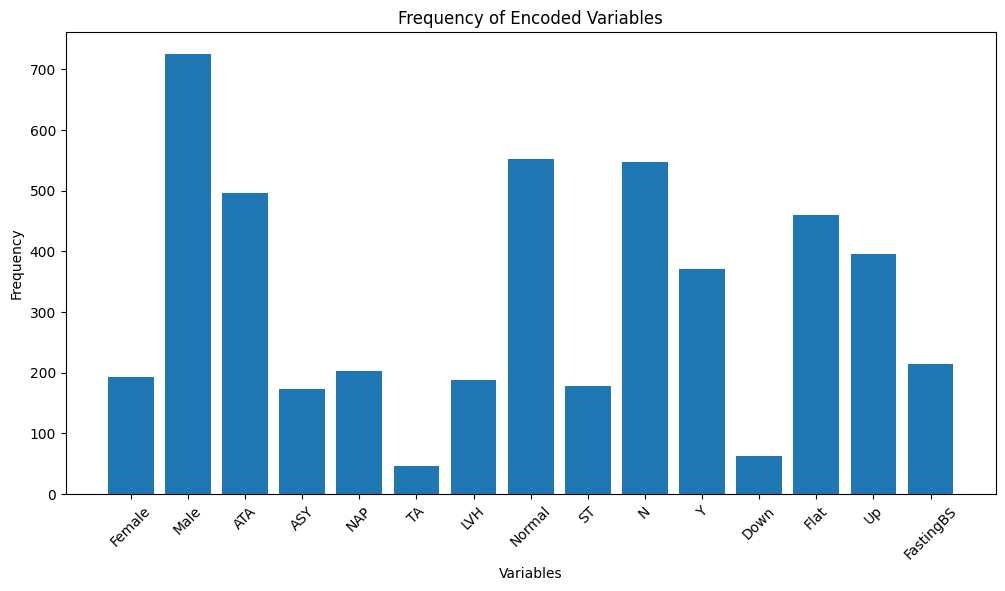

In [ ]:
sum = X_encoded.sum()

plt.figure(figsize=(12, 6))
plt.bar(sum.index, sum.values)
plt.xlabel('Variables')
plt.ylabel('Frequency')
plt.title('Frequency of Encoded Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Concatenate the encoded and scaled features
X_processed = pd.concat([X_encoded, X_scaled], axis=1)
X_processed.head()

,Female,Male,ATA,ASY,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,FastingBS,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05)

outliers = iso_forest.fit_predict(X_processed)
X_filtered = X_processed[outliers == 1]
y_filtered = y[outliers == 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)



In [ ]:
X_train.head()

,Female,Male,ATA,ASY,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,FastingBS,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
566,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-1.327067,0.951331,-0.254285,-0.346192,0.574711
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.264027,-0.399724,-1.818435,-1.525138,-2.708624
804,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1.749048,1.491752,0.642129,-0.974963,1.888046
320,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.582246,-0.399724,-1.818435,1.500823,1.606617
336,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1.961193,1.491752,-1.818435,-0.896367,0.668521


In [ ]:
X_train.shape

(697, 20)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=50,validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 22ms/step - loss: 0.6935 - accuracy: 0.5081 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6061 - accuracy: 0.6661 - val_loss: 0.5802 - val_accuracy: 0.7214
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5400 - accuracy: 0.7792 - val_loss: 0.5030 - val_accuracy: 0.8357
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4806 - accuracy: 0.8187 - val_loss: 0.4412 - val_accuracy: 0.8429
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4333 - accuracy: 0.8330 - val_loss: 0.3906 - val_accuracy: 0.8643
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.3988 - accuracy: 0.8330 - val_loss: 0.3566 - val_accuracy: 0.8786
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8420 - val_loss: 0.3318 - val_accuracy: 0.8929
Epoch 8/50
18/18 [=

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

6/6 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8686
Test loss: 0.347289115190506, Test accuracy: 0.868571400642395


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

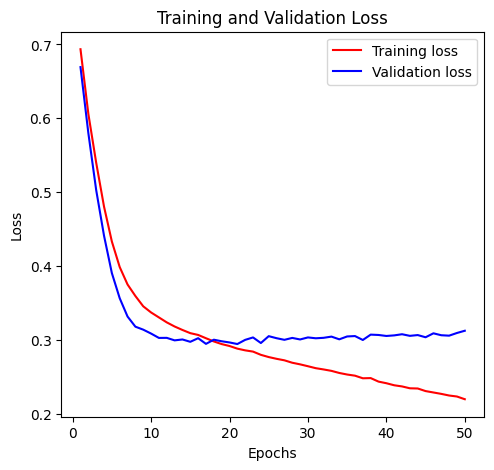

In [ ]:
epochs = range(1, 51)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

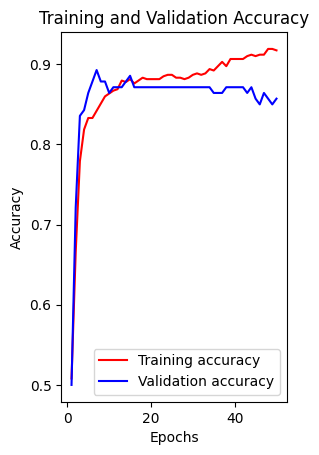

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

6/6 [==============================] - 0s 3ms/step


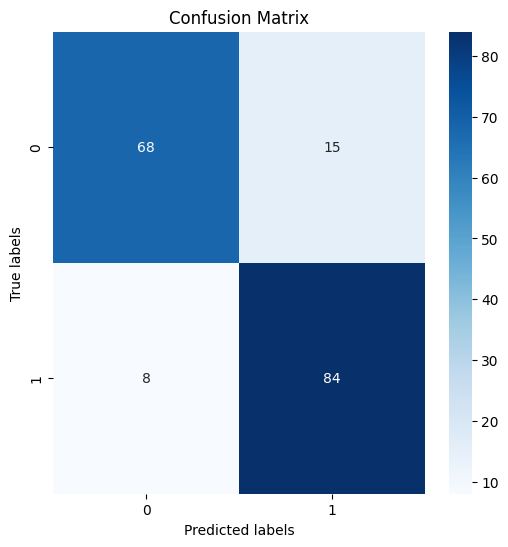

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_filtered.shape

(872, 20)

In [ ]:
y_filtered.shape

(872,)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

In [ ]:
X_resampled.shape

(962, 20)

In [ ]:
y_resampled.shape

(962,)

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
model_resampled = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_resampled.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history_resampled = model_resampled.fit(X_train, y_train, epochs=50,validation_split=0.2)

In [ ]:
loss_resampled, accuracy_resampled = model_resampled.evaluate(X_test_resampled, y_test_resampled)
print(f'Test loss: {loss_resampled}, Test accuracy: {accuracy_resampled}')

7/7 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8860
Test loss: 0.2559230923652649, Test accuracy: 0.8860103487968445
